In [1]:
# Import code libraries
library(ggplot2)

In [11]:
# Read in the seed phenotype data from a file
seed.pheno = read.table(file = "test_data.txt", sep = "\t", header = TRUE)
head(seed.pheno)

,username,marker_area,genotype,HEADER_SHAPES,area,hull.area,solidity,perimeter,width,height,ellip.h,center.of.mass.x,center.of.mass.y,hull_vertices,in_bounds,ellipse_center_x,ellipse_center_y,ellipse_major_axis,ellipse_minor_axis,ellipse_angle,ellipse_eccentricity
1,nfahlgren,26828,NF0000001,SHAPES_DATA,518,496,1.044355,87.01219,28,26,⋯,978.3012,1711.728,13,TRUE,978.2892,1711.756,31.30124,19.69082,46.79047,0.7773449
2,nfahlgren,26828,NF0000001,SHAPES_DATA,358,339,1.056047,72.52691,26,18,⋯,1083.05,1636.397,18,TRUE,1083.081,1636.446,26.37756,15.96456,108.2205,0.7960486
3,nfahlgren,26828,NF0000001,SHAPES_DATA,304,299,1.016722,71.59798,18,25,⋯,947.523,1639.507,16,TRUE,947.5441,1639.561,24.73536,14.54783,18.62836,0.8087599
4,nfahlgren,26828,NF0000001,SHAPES_DATA,284,270.5,1.049908,65.69848,22,19,⋯,1003.736,1596.82,16,TRUE,1003.818,1596.825,23.6833,14.03038,127.6339,0.8056317
5,nfahlgren,26828,NF0000001,SHAPES_DATA,335,330,1.015152,74.18377,22,24,⋯,922.5045,1594.266,17,TRUE,922.5571,1594.297,26.83026,14.78097,142.8003,0.8345669
6,nfahlgren,26828,NF0000001,SHAPES_DATA,289,275.5,1.049002,65.94112,23,19,⋯,1081.941,1582.574,16,TRUE,1081.987,1582.596,24.23799,13.89204,121.2033,0.8194494


In [12]:
# Normalize the seed area by the marker area to account for differences between cameras
seed.pheno$norm_area = seed.pheno$area / seed.pheno$marker_area
head(seed.pheno)

,username,marker_area,genotype,HEADER_SHAPES,area,hull.area,solidity,perimeter,width,height,ellip.h,center.of.mass.y,hull_vertices,in_bounds,ellipse_center_x,ellipse_center_y,ellipse_major_axis,ellipse_minor_axis,ellipse_angle,ellipse_eccentricity,norm_area
1,nfahlgren,26828,NF0000001,SHAPES_DATA,518,496,1.044355,87.01219,28,26,⋯,1711.728,13,TRUE,978.2892,1711.756,31.30124,19.69082,46.79047,0.7773449,0.01930819
2,nfahlgren,26828,NF0000001,SHAPES_DATA,358,339,1.056047,72.52691,26,18,⋯,1636.397,18,TRUE,1083.081,1636.446,26.37756,15.96456,108.2205,0.7960486,0.01334427
3,nfahlgren,26828,NF0000001,SHAPES_DATA,304,299,1.016722,71.59798,18,25,⋯,1639.507,16,TRUE,947.5441,1639.561,24.73536,14.54783,18.62836,0.8087599,0.01133144
4,nfahlgren,26828,NF0000001,SHAPES_DATA,284,270.5,1.049908,65.69848,22,19,⋯,1596.82,16,TRUE,1003.818,1596.825,23.6833,14.03038,127.6339,0.8056317,0.01058595
5,nfahlgren,26828,NF0000001,SHAPES_DATA,335,330,1.015152,74.18377,22,24,⋯,1594.266,17,TRUE,922.5571,1594.297,26.83026,14.78097,142.8003,0.8345669,0.01248695
6,nfahlgren,26828,NF0000001,SHAPES_DATA,289,275.5,1.049002,65.94112,23,19,⋯,1582.574,16,TRUE,1081.987,1582.596,24.23799,13.89204,121.2033,0.8194494,0.01077233


Saving 7 x 7 in image


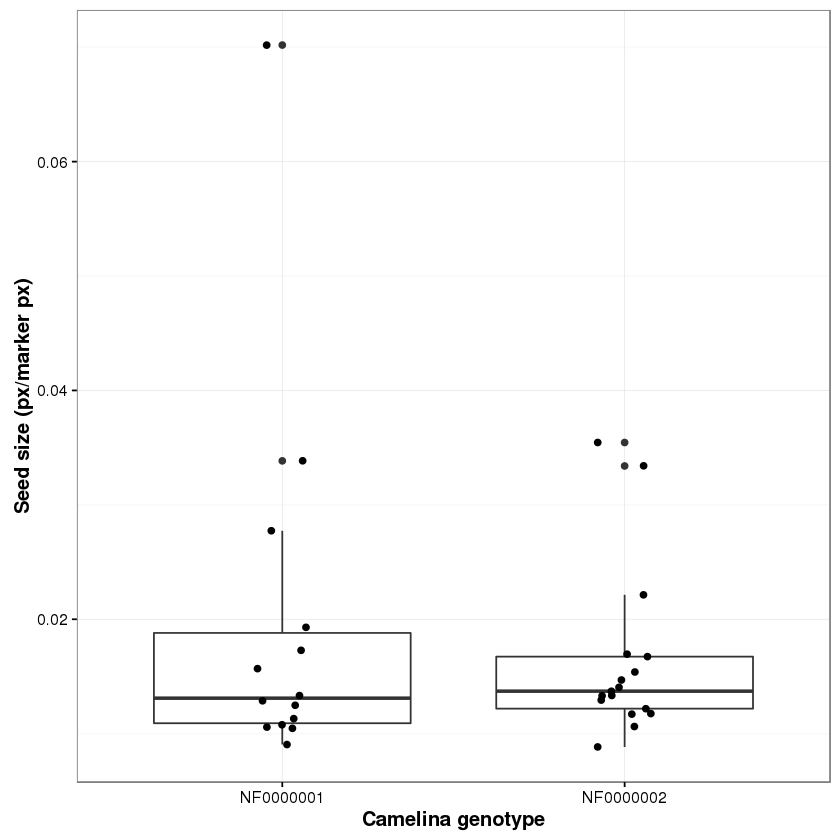

In [13]:
# Plot the distribution of seed size by genotype
seed.boxplot = ggplot(seed.pheno, aes(x = genotype, y = norm_area)) + 
               geom_boxplot() +
               geom_jitter(width = 0.2) +
               scale_x_discrete("Camelina genotype") +
               scale_y_continuous("Seed size (px/marker px)") +
               theme_bw() +
               theme(axis.title.x = element_text(face = 'bold'), 
                     axis.title.y = element_text(face = 'bold'))
ggsave('seed_size_boxplot.pdf')
print(seed.boxplot)

In [17]:
# Is there a significant difference between genotypes?
seed.aov = aov(norm_area ~ genotype, data = seed.pheno)
print(seed.aov)
summary(seed.aov)

Call:
   aov(formula = norm_area ~ genotype, data = seed.pheno)

Terms:
                   genotype   Residuals
Sum of Squares  0.000085364 0.004290636
Deg. of Freedom           1          29

Residual standard error: 0.01216359
Estimated effects may be unbalanced


            Df   Sum Sq   Mean Sq F value Pr(>F)
genotype     1 0.000085 8.536e-05   0.577  0.454
Residuals   29 0.004291 1.479e-04               